# Data Preprocessign

**Importing Librarires**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [3]:
df = pd.read_csv("wine_data.csv")

**About the Dataset**

In [7]:
print(df.shape)

df.describe()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Checking Missing Values**

In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


No missing Values found

**1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?**

In [10]:
quality_counts = df['quality'].value_counts()
most_frequent_quality = quality_counts.idxmax()
most_frequent_count = quality_counts.max()

max_quality = df['quality'].max()
min_quality = df['quality'].min()


print(f"Most frequently occurring wine quality: {most_frequent_quality} (count: {most_frequent_count})")
print(f"Highest wine quality score: {max_quality}")
print(f"Lowest wine quality score: {min_quality}")


Most frequently occurring wine quality: 5 (count: 681)
Highest wine quality score: 8
Lowest wine quality score: 3


From above we say that
- Most frequently occurring wine quality: 5
-Highest wine quality score: 8
-Lowest wine quality score: 3



**2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?**

In [11]:
corr_fixed_acidity = df['fixed acidity'].corr(df['quality'])
corr_alcohol = df['alcohol'].corr(df['quality'])
corr_free_sulfur_dioxide = df['free sulfur dioxide'].corr(df['quality'])


print(f"Correlation between fixed acidity and quality: {corr_fixed_acidity:.3f}")
print(f"Correlation between alcohol content and quality: {corr_alcohol:.3f}")
print(f"Correlation between free sulfur dioxide and quality: {corr_free_sulfur_dioxide:.3f}")


Correlation between fixed acidity and quality: 0.124
Correlation between alcohol content and quality: 0.476
Correlation between free sulfur dioxide and quality: -0.051


##  Correlation Analysis: Wine Quality vs Selected Features

| Feature                 | Correlation with Quality | Interpretation                                                                 |
|------------------------|--------------------------|---------------------------------------------------------------------------------|
| **Fixed Acidity**       | `+0.124`                 | Weak positive correlation. Slight tendency for wines with higher fixed acidity to have better quality. |
| **Alcohol Content**     | `+0.476`                 | Moderate to strong positive correlation. Wines with **higher alcohol** content are generally rated **higher in quality**. |
| **Free Sulfur Dioxide** | `-0.051`                 | Very weak negative correlation. Minimal or no significant impact on quality.    |

---

###Insights:
- **Alcohol** has the **strongest impact** on wine quality among the three.
- **Fixed acidity** has a **mild effect** on quality.
- **Free sulfur dioxide** shows **no meaningful correlation**, suggesting it doesn’t influence sensory quality much.


**3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?**

In [12]:
best_quality = df['quality'].max()
worst_quality = df['quality'].min()

avg_sugar_best = df[df['quality'] == best_quality]['residual sugar'].mean()
avg_sugar_worst = df[df['quality'] == worst_quality]['residual sugar'].mean()
print(f"Average residual sugar for best quality wine (quality = {best_quality}): {avg_sugar_best:.3f} g/L")
print(f"Average residual sugar for worst quality wine (quality = {worst_quality}): {avg_sugar_worst:.3f} g/L")


Average residual sugar for best quality wine (quality = 8): 2.578 g/L
Average residual sugar for worst quality wine (quality = 3): 2.635 g/L


##  Average Residual Sugar by Wine Quality

### Comparison Between Best and Worst Quality Wines

| Wine Quality | Average Residual Sugar (g/L) |
|--------------|------------------------------|
| **Best (8)** | 2.578                        |
| **Worst (3)**| 2.635                        |

---

###  Insights:
- Wines with the **best quality (8)** have an average residual sugar of **2.578 g/L**.
- Wines with the **lowest quality (3)** have an average residual sugar of **2.635 g/L**.
-  The **difference is small**, indicating that **residual sugar** may **not significantly influence** wine quality in this dataset.


**4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?**

Correlation between volatile acidity and quality: -0.391


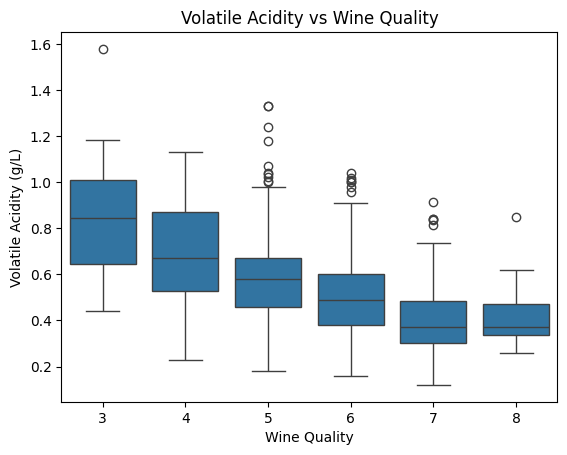

In [13]:
corr_volatile = df['volatile acidity'].corr(df['quality'])
print(f"Correlation between volatile acidity and quality: {corr_volatile:.3f}")

# Plot the relationship
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity (g/L)')
plt.show()


##  Effect of Volatile Acidity on Wine Quality

###  Correlation:
- **Correlation between volatile acidity and wine quality**: `-0.391`

###  Interpretation:
- This is a **moderate negative correlation**, meaning:
  - As **volatile acidity increases**, **wine quality tends to decrease**.
  - Lower volatile acidity is associated with **higher quality wines**.

###  Visual Insight:
The following boxplot clearly shows the downward trend in volatile acidity as wine quality increases:



- Quality `3` and `4` wines tend to have **higher volatile acidity**.
- Quality `7` and `8` wines show **lower and tighter** distributions of volatile acidity.
- This visual confirms that **volatile acidity is an important factor negatively affecting wine quality**.


**5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.**

Importing libraries and defining X(features) and y(target)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)


X = df.drop("quality", axis=1)
y = df["quality"]





Feature Scaling and Test-Train Split

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



Model Training

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



Metrics Calculation

In [18]:

def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)



--- Decision Tree ---
Accuracy: 0.5625
Precision (macro): 0.3013796097334028
Recall (macro): 0.3012043512043512
F1-score (macro): 0.301143625279296

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.64      0.68      0.66       130
           6       0.54      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.56      0.56       320

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  1  4  5  0  0]
 [ 1  3 88 36  2  0]
 [ 0  4 39 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


--- Random Forest ---
Accuracy: 0.65
Precision (macro): 0.32514868961283144
Recall (macro): 0.324014874014874
F1-score (macro): 0.323452

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Wine Quality Prediction: Model Comparison

###  Accuracy & Metrics

| Metric            | Decision Tree | Random Forest |
|-------------------|---------------|----------------|
| Accuracy          | 0.5625        | 0.6500         |
| Precision (macro) | 0.3014        | 0.3251         |
| Recall (macro)    | 0.3012        | 0.3240         |
| F1-score (macro)  | 0.3011        | 0.3235         |

###  Summary

- **Random Forest** performed better than **Decision Tree** across all metrics.
- Best predictions were for wine quality scores **5** and **6**.
- **Random Forest** is preferred for this task.


**Sample Tests**

In [19]:
sample = [[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]]
sample_scaled = scaler.transform(sample)

pred_dt = dt_model.predict(sample_scaled)

pred_rf = rf_model.predict(sample_scaled)


print(f"Decision Tree Prediction: {pred_dt[0]}")
print(f"Random Forest Prediction: {pred_rf[0]}")


Decision Tree Prediction: 5
Random Forest Prediction: 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
quality_sample = [[12.0, 1.2, 0.0, 6.0, 0.120, 5.0, 20.0, 1.0030, 2.90, 0.30, 8.0]]


quality_scaled = scaler.transform(quality_sample)

pred_dt = dt_model.predict(quality_scaled)
pred_rf = rf_model.predict(quality_scaled)

print(f"Decision Tree Prediction: {pred_dt[0]}")
print(f"Random Forest Prediction: {pred_rf[0]}")


Decision Tree Prediction: 3
Random Forest Prediction: 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Conclusion

This analysis explored the characteristics of a wine dataset and built machine learning models to predict wine quality.

**Key Findings from Data Analysis:**

*   The most frequent wine quality in the dataset is 5, with quality scores ranging from 3 to 8.
*   Alcohol content shows the strongest positive correlation with wine quality, suggesting that higher alcohol content is associated with better quality wines.
*   Volatile acidity has a moderate negative correlation with wine quality; lower volatile acidity is generally found in higher quality wines.
*   Fixed acidity shows a weak positive correlation, and residual sugar and free sulfur dioxide have minimal correlation with wine quality.

**Model Performance:**

Two classification models, Decision Tree and Random Forest, were trained to predict wine quality.

*   The **Random Forest** model achieved a higher accuracy (0.6500) compared to the Decision Tree model (0.5625).
*   Both models performed best in predicting wine qualities 5 and 6, which are the most prevalent in the dataset.
*   Based on the evaluation metrics, the **Random Forest model is the preferred choice** for predicting wine quality in this dataset.

Further improvements could involve exploring other features, trying different models, or employing techniques to address the class imbalance for less frequent quality scores.